# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [458]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [459]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## 1. MLE recipe

Let's suppose you're given $n$ one dimensional data points $D = \{d_0, d_1, ...,  d_{n-1} \}$ which you believe follow a normal distribution. In this case, your model has two parameters: $\mu$ and $\sigma^2$.

Given your data $D$, you wish to find the most likely parameters of the normal distribution.
Let's assume the standard deviation ($\sigma$) is 0.5, now estimate the parameter $\mu$ of the model (the mean of the normal distribution representing your data). 

Use the Maximum Likelihood Estimate (MLE) formula to show that $\mu_{ML} = \frac{1}{n}\sum_i d_i$.

**Hint**: assuming the data points are independent, we have 

$$p(D|\mu) = \prod_i p(d_i | \mu) = \prod_i \mathcal{N}(d_i|\mu, \sigma^2)$$

Additionally, since this is a convex function, we can analytically find the stationary point that maximises the function where $\frac{dp(D|\mu)}{d\mu} = 0$.

**Note:** This should be done on paper (and ideally typed up in $\LaTeX$ in the cell below), not using Python.

### Answer

Write here your answer using latex notation. Alternatively, write your solution on paper and show it to a TA.

## 2. MLE with Python

We know want you to write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

[[ 0.49243 ]
 [ 0.62491 ]
 [ 0.85002 ]
 [ 1.2884  ]
 [ 0.7762  ]
 [ 0.57076 ]
 [ 0.27376 ]
 [ 0.99141 ]
 [-0.34415 ]
 [ 0.11251 ]
 [ 1.0682  ]
 [ 0.92343 ]
 [ 0.06158 ]
 [ 0.96851 ]
 [ 0.93473 ]
 [ 0.10785 ]
 [ 0.66411 ]
 [ 1.501   ]
 [ 0.45324 ]
 [ 0.026227]
 [ 0.77938 ]
 [ 0.41992 ]
 [ 0.52065 ]
 [ 0.90508 ]
 [ 0.67258 ]
 [ 0.50928 ]
 [ 0.18414 ]
 [ 0.28987 ]
 [ 0.18824 ]
 [ 0.39742 ]
 [ 1.5803  ]
 [ 0.77383 ]
 [ 0.42532 ]
 [ 0.63607 ]
 [ 0.82266 ]
 [ 0.83804 ]
 [ 0.85936 ]
 [ 1.2453  ]
 [ 0.52806 ]
 [ 0.87756 ]
 [ 0.39069 ]
 [-0.22948 ]
 [ 0.41403 ]
 [ 1.409   ]
 [ 0.5227  ]
 [ 1.2109  ]
 [ 1.0009  ]
 [ 0.40137 ]
 [ 1.6567  ]
 [ 1.1367  ]]
(50, 1)


(array([2., 1., 5., 9., 8., 8., 8., 4., 2., 3.]),
 array([-0.34415 , -0.144065,  0.05602 ,  0.256105,  0.45619 ,  0.656275,
         0.85636 ,  1.056445,  1.25653 ,  1.456615,  1.6567  ]),
 <BarContainer object of 10 artists>)

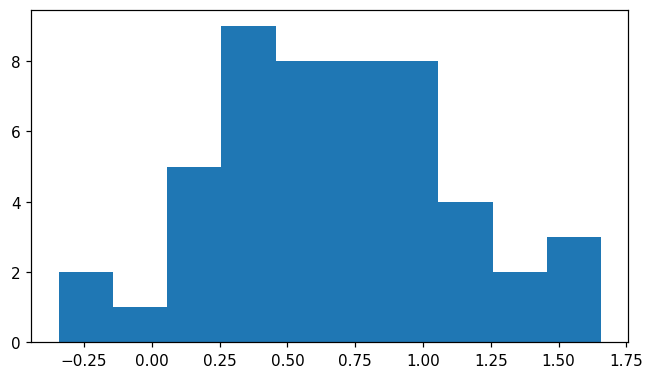

In [460]:
# write your code here
file = open("data1.dat")
data = np.loadtxt(file)
data = data[:,None]
print(data)
print(data.shape)
plt.hist(data)

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [461]:
# write your code here
def compute_likelihood(data_set, mu):
    likelihood = 1
    distribution = stats.norm(mu, 0.5)
    for data_each in data_set:
        likelihood = likelihood * distribution.pdf(data_each)
    return likelihood


Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

In [462]:
# write your code here
def loop_likelihood(data_set):
    list_mu = np.arange(0, 1.01, 0.01)
    result_likelihood = np.empty([0, 2])

    for mu in list_mu:
        likelihood = compute_likelihood(data_set, mu)
        value = np.array([mu, likelihood[0]])
        result_likelihood = np.vstack((result_likelihood, value))

    return result_likelihood

all_likelihood = loop_likelihood(data)
print(all_likelihood)
print(all_likelihood.shape)

[[0.00000000e+00 8.13741147e-34]
 [1.00000000e-02 3.10295510e-33]
 [2.00000000e-02 1.15978855e-32]
 [3.00000000e-02 4.24909314e-32]
 [4.00000000e-02 1.52590606e-31]
 [5.00000000e-02 5.37122633e-31]
 [6.00000000e-02 1.85324663e-30]
 [7.00000000e-02 6.26768405e-30]
 [8.00000000e-02 2.07775857e-29]
 [9.00000000e-02 6.75145193e-29]
 [1.00000000e-01 2.15037097e-28]
 [1.10000000e-01 6.71341827e-28]
 [1.20000000e-01 2.05441480e-27]
 [1.30000000e-01 6.16235443e-27]
 [1.40000000e-01 1.81183783e-26]
 [1.50000000e-01 5.22162984e-26]
 [1.60000000e-01 1.47505071e-25]
 [1.70000000e-01 4.08434042e-25]
 [1.80000000e-01 1.10853912e-24]
 [1.90000000e-01 2.94913208e-24]
 [2.00000000e-01 7.69044614e-24]
 [2.10000000e-01 1.96572589e-23]
 [2.20000000e-01 4.92502556e-23]
 [2.30000000e-01 1.20950629e-22]
 [2.40000000e-01 2.91153412e-22]
 [2.50000000e-01 6.86988943e-22]
 [2.60000000e-01 1.58888228e-21]
 [2.70000000e-01 3.60203398e-21]
 [2.80000000e-01 8.00420124e-21]
 [2.90000000e-01 1.74342112e-20]
 [3.000000

### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [463]:
# write your code here
all_likelihood = loop_likelihood(data)
y = np.max(all_likelihood[:,1])
print(y)
mmu = 0
for likelihood in all_likelihood:
    if likelihood[1] == y:
        print(likelihood[0])
        mmu = likelihood[0]

4.4911923712397484e-14
0.67


### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

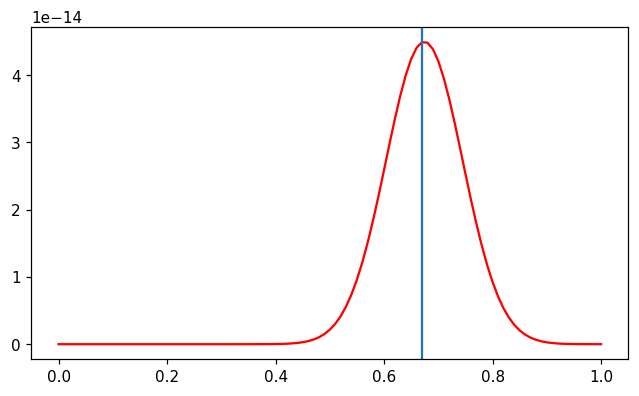

In [464]:
# write your code here

fig, ax = plt.subplots()
#myhist = ax.hist(data)

line = ax.plot(all_likelihood[:,0], all_likelihood[:,1], c='red')
plt.axvline(mmu)
plt.show()

### Comparison with MLE recipe

Now implement the MLE recipe for $\mu_\text{ML}$ you solved at the beginning of this sheet to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [465]:
# write your code here
MLEmu = sum(data) / data.shape
print(MLEmu)

[ 0.67423394 33.711697  ]


# 3. Posterior probability

Let's suppose now we have some prior knowledge regarding our parameter $\mu$. More precisely, our belief is that the probability density function (pdf) $p(\mu)$ modelling our parameter is also given by a normal distribution.

Assuming that $\mu \sim \mathcal{N}(0.5,0.01)$, write two functions, `compute_posterior(D, mu)` and `loop_posterior(D)`, to find $\mu_{\text{MAP}} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [466]:
# write your code here
def loop_posterior(data_set):
    list_mu1 = np.random.randn(100) * 0.1 + 0.5
    dis = stats.norm(0.5, 0.1)

    list_mu1 = sorted(list_mu1, )

    result_likelihood = np.empty([0, 2])

    for mu in list_mu1:
        likelihood = compute_likelihood(data_set, mu)  * dis.pdf(mu)
        value = np.array([mu, likelihood[0]])
        result_likelihood = np.vstack((result_likelihood, value))

    return result_likelihood

loop_posterio = loop_posterior(data)
y = np.max(loop_posterio[:,1])
posteriror = 0
for likelihood in loop_posterio:
    if likelihood[1] == y:
        posteriror = likelihood[0]
print(posteriror)


0.6152283866027733


### Visual interpretation


Now plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

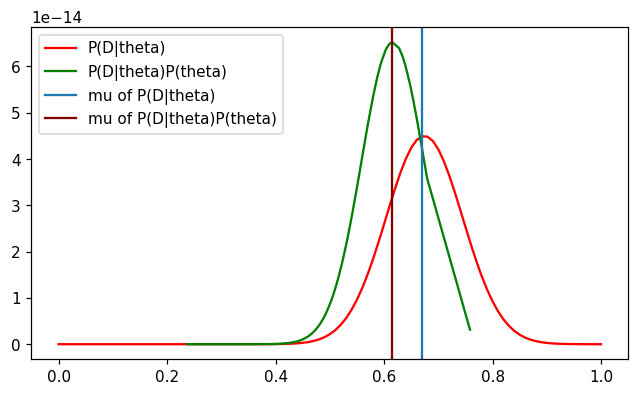

In [467]:
# write your code here
fig, ax = plt.subplots()
#myhist = ax.hist(data)
plt.plot(all_likelihood[:,0], all_likelihood[:,1], c='red', label="P(D|theta)")
plt.plot(loop_posterio[:,0], loop_posterio[:,1], c='green', label="P(D|theta)P(theta)")
plt.axvline(mmu, label="mu of P(D|theta)")
plt.axvline(posteriror, label="mu of P(D|theta)P(theta)", c="maroon")
plt.legend(loc="upper left")
plt.show()

Repeat now the above calculations for `data2.dat` and `data3.dat`. 

For both files, plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$.

In [468]:
# write your code here
def find_max(np_array):
    max_y = np.max(np_array[:,1])

    for value in np_array:
        if value[1] == max_y:
            return value[0]


def draw_graph(mle, posterior):
    # write your code here
    figddd, axddd = plt.subplots()
    #myhist = ax.hist(data)
    max_mle = find_max(mle)
    max_posterior = find_max(posterior)
    plt.plot(mle[:,0], mle[:,1], c='red', label="P(D|theta)")
    plt.plot(posterior[:,0], posterior[:,1], c='green', label="P(D|theta)P(theta)")
    plt.axvline(max_mle, label="mu of P(D|theta)")
    plt.axvline(max_posterior, label="mu of P(D|theta)P(theta)", c="maroon")
    plt.legend(loc="upper left")
    plt.show()


def plot_data(file_name):
    file_data = open(file_name)
    data_array = np.loadtxt(file_data)
    data_array = data_array[:,None]

    mle_data = loop_likelihood(data_array)
    posterior_data = loop_posterior(data_array)

    draw_graph(mle_data, posterior_data)

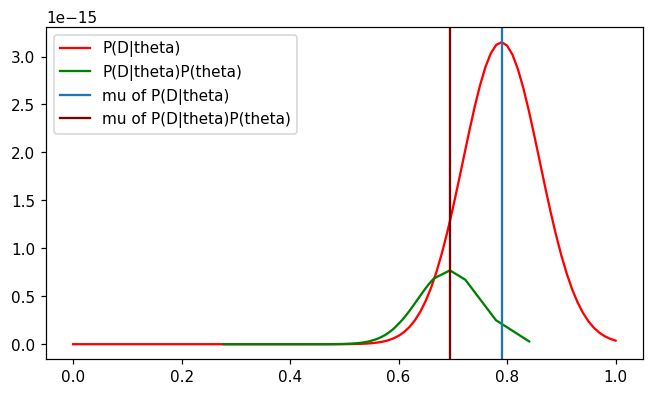

In [469]:
plot_data("data2.dat")

### Quest
ion

Observe the results obtained on `data2` and `data3`. What can we tell by looking at the figures you plotted above?

### CORRECT ANSWER

When the likelihood is further from the suggested prior, we are less confident about our measurements, and thus we observe a larger distance between the two distributions' mean.

## EXTRA 1

Until now, you assumed that our data was generated from a normal distribution with $\sigma^2 = 0.25$. 

Remove this assumption and estimate $\theta_{\text{MAP}} = [\mu_{\text{MAP}}, \sigma_{\text{MAP}}]$ experimentally by looping through different values of $\mu$ and $\sigma$. 

Assume the pdf $p(\sigma)$ is given by $\mathcal{N}(0.5, 0.16)$.

You may need to use `np.nanargmax` instead of `np.argmax`.

In [470]:
# write your code here

## EXTRA 2

Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface`).
![MLE mesh](mle2.png)

In [471]:
# write your code here